In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Index2018.csv to Index2018.csv


In [ ]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [ ]:
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


## EDA & Data Preparation

In [ ]:
df_comp = raw_csv_data

In [ ]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
#check NA values
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
#check NA values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Initial Visualization

<function matplotlib.pyplot.show(*args, **kw)>

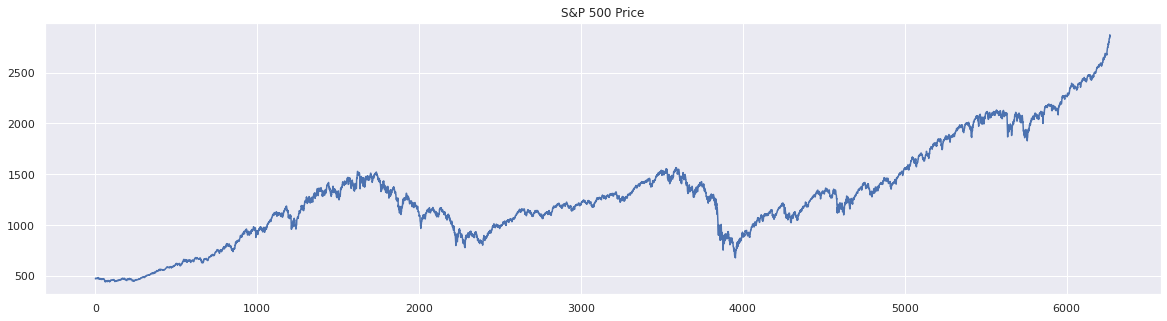

In [ ]:
df_comp.spx.plot(figsize=(20,5), title='S&P 500 Price')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

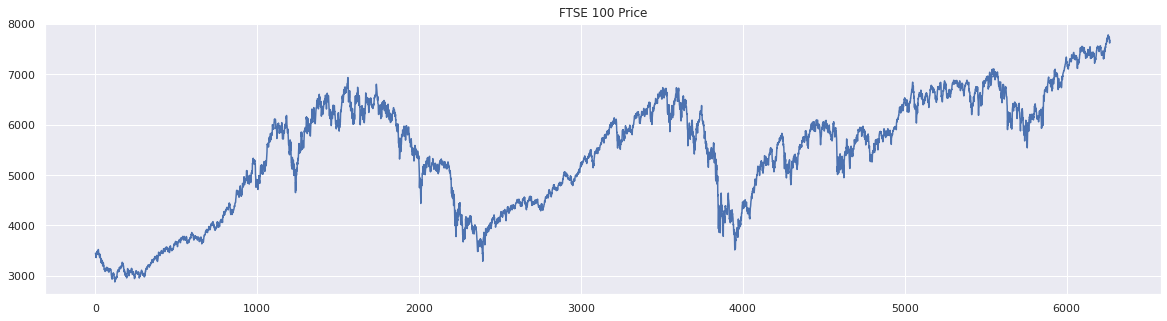

In [ ]:
df_comp.ftse.plot(figsize=(20,5), title='FTSE 100 Price')
plt.show

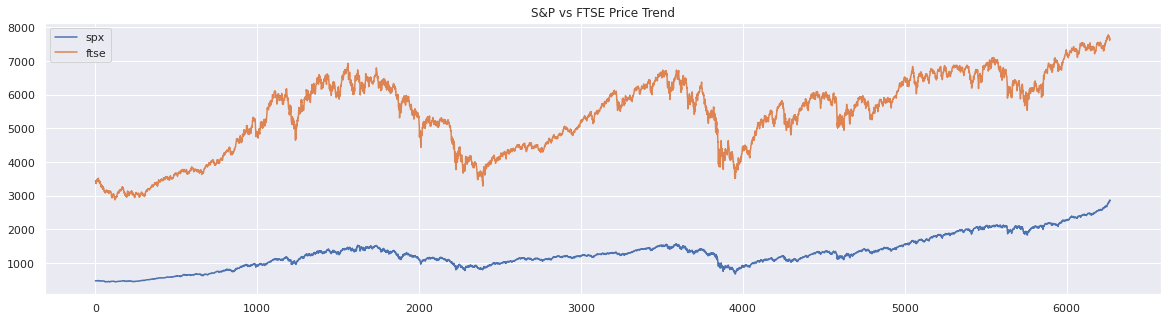

In [ ]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title('S&P vs FTSE Price Trend')
plt.legend()
plt.show()

## Probability Plot

In [ ]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(*args, **kw)>

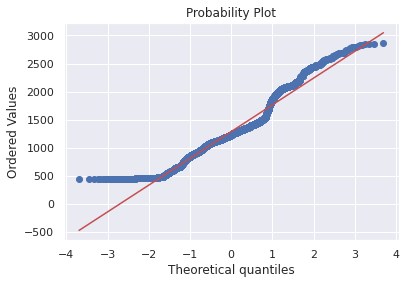

In [ ]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show

Insight: S&P does not follow a normal distribution time series

### Trimming Data

In [ ]:
#convert date values to date
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [ ]:
df_comp.date.describe()

<ipython-input-54-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
#replace the first column with date
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Set a desirable date frequency for time analysis

In [ ]:
#exclude weekends and holidays to align with business days
df_comp = df_comp.asfreq("b")
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
#check dates missing price reporting
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
#fill the missing values
##Forward filling was chosen

df_comp.spx = df_comp.spx.fillna(method = "ffill")
df_comp.dax = df_comp.dax.fillna(method = "ffill")
df_comp.ftse = df_comp.ftse.fillna(method = "ffill")
df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")

#df_comp.spx = df_comp.spx.fillna(value = df_comp.spx.mean())
#df_comp.ftse = df_comp.ftse.fillna(value = df_comp.ftse.mean())

In [ ]:
#check dates missing price reporting
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
df_comp['market_value']=df_comp.spx
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [ ]:
#simplify the dataset by dropping other price values
del df_comp['dax'], df_comp['spx'], df_comp['ftse'], df_comp['nikkei']

In [ ]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Train and Test Datasets

split the df_comp into train (80%) and test (20%) dataset
* Training Set: From the beginning up to some cut off points
* Testing Set: From the cut off point until the end

In [ ]:
size = int(len(df_comp)*0.8)

In [ ]:
size

5021

In [ ]:
df = df_comp.iloc[:size]        #train set
df_test = df_comp.iloc[size:]   #test set

In [ ]:
df.shape[0]

5021

In [ ]:
df_test.shape[0]

1256

In [ ]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [ ]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


two data sets are consecutive

## Plotting time series graph

**[1] White Noise**
: A special type of time series where the data doesn't follow a pattern

* if the variables are independent and identically distributed with a mean of zero
* each value has a zero correlation with all other values in the series

*  Conditions for white noise:
  * Constant mean  μ 
  * Constant variance  σ2 
  * No autocorrelation in any period

* Autocorrelation:  **ρ=corr(xt,xt−1)**

No autocorrelation means no clear relationship between past and present values.



In [ ]:
wn = np.random.normal(loc = 1288.127, scale = 487.56, size = len(df))
#wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(), size = len(df))

In [ ]:
df['wn']=wn

<ipython-input-73-668c275da1fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']=wn


In [ ]:
df

,market_value,wn
date,,
1994-01-07,469.900000,988.312072
1994-01-10,475.270000,1425.301849
1994-01-11,474.130000,486.660918
1994-01-12,474.170000,1517.888236
1994-01-13,472.470000,1599.664291
...,...,...
2013-04-01,1562.173837,961.087237
2013-04-02,1570.252238,853.228911
2013-04-03,1553.686978,648.547670


In [ ]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1281.692772
std,292.559287,480.851077
min,438.920000,-369.476845
25%,914.620000,951.159513
50%,1144.650000,1280.937747
75%,1316.280729,1608.265174
max,1570.252238,2865.459962


Although both 'market_value' and 'wn' are normally distributed around the mean of the S&P price, the mean values of them are not the same.  It is because each one is generated individually and separately.

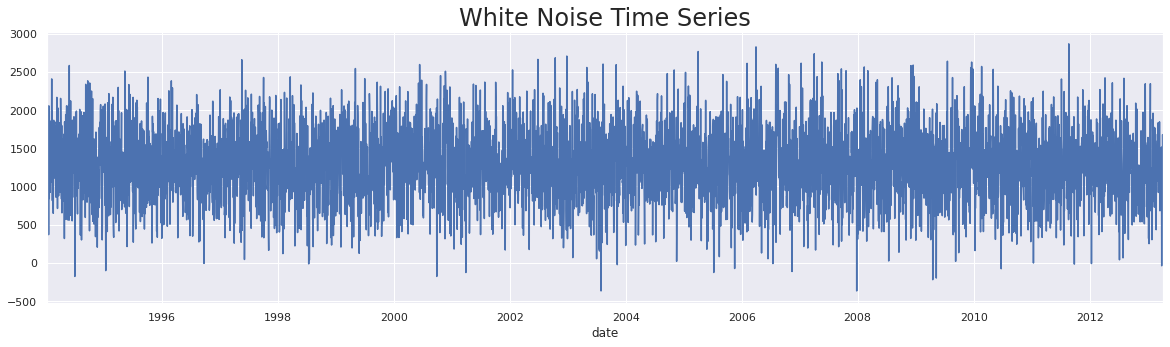

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series", size = 24)
plt.show()

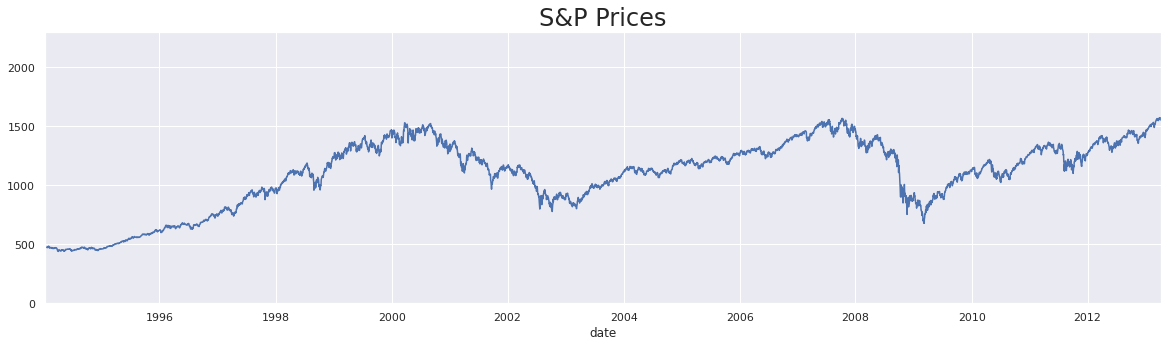

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices",size = 24)
plt.ylim(0,2300)
plt.show()

## Comparing S&P Price Trend with Random Walk

**[2] Random Walk**
: Definition: A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.
* starting from 0 to generate random time trend

Pt  = Prices

ϵt  = residuals

Pt=Pt−1+ϵt  where  ϵt  ~WN(μ, σ2 )


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RandWalk.csv to RandWalk.csv


In [ ]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace=True)
rw=rw.asfreq('b')

In [ ]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df['rw']=rw.price

<ipython-input-83-ba182e42fbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw']=rw.price


In [ ]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,988.312072,1122.139662
1994-01-10,475.27,1425.301849,1080.347860
1994-01-11,474.13,486.660918,1082.095245
1994-01-12,474.17,1517.888236,1083.639265
1994-01-13,472.47,1599.664291,1067.146255


### Compare Random Walk and S&P Price Trend

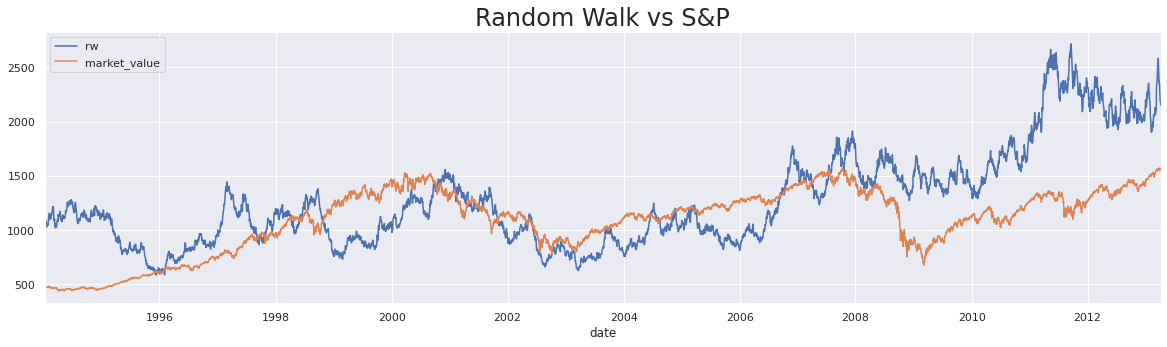

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend()
plt.show()
#Small variation between consecutive time periods
#Cyclical increases and decreases in short periods of time

If a time series resembles a random walk, the prices cannot be predicted with great accuracy. If future prices can be predicted with great accuracy, then there are **arbitrage** oppotunities.
* **Arbitrage**: Buy and sell commodities and make a safe profit (while the price adjusts)

# Statistical Test (Stationarity)

Time Series **Stationarity** implies that taking consecutive samples of data with the same size should have identical covariances regardless of the starting point
> Cov(S1)=Cov(S2)

It is known as "weak-form" stationarity or "covariance" stationarity

Covariance Stationarity Assumptions

* Constant μ
* Constant  σ2 
* Cov( Xn,Xn+k ) = Cov( Xm,Xm+k )

In [ ]:
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

### Conduct Dickey-Fuller Test

**(1) Dickey–Fuller test on market value**

In [ ]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

* first line: test statistics
* second line: p value associated with the t-statistics -- **41.21%(0.4121) of not rejecting the null hypothesis, which indicates non-stationary**
* third line: number of lags
* fourth line: the number of observations used
* last line: estimate the maximized information criteria (the lower the values, the easier to make predictions)

**(2) Dickey–Fuller test on wn**

In [ ]:
sts.adfuller(df.wn)

(-69.87771150036494,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 75768.00990987831)

* first line: test statistics
* second line: p value associated with the t-statistics -- **0%(0.0), which is below 0.05, of not rejecting the null hypothesis, which indicates it is stationary**
* third line: number of lags
* fourth line: the number of observations used
* last line: estimate the maximized information criteria (the lower the values, the easier to make predictions)

**(3) Dickey–Fuller test on rw**

In [ ]:
sts.adfuller(df.rw)

## p value: 0.61598, which is above 0.05
## it is non-stationary data

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

* first line: test statistics
* second line: p value associated with the t-statistics -- **61.6%(0.61598), which is above 0.05, of not rejecting the null hypothesis, which indicates it is a non-stationary process**
* third line: number of lags
* fourth line: the number of observations used
* last line: estimate the maximized information criteria (the lower the values, the easier to make predictions)